In [1]:
#Nombre: ProcesoParalelo
#Autor: PhD (C) Manuel Alejandro Pastrana Pardo
#Fecha de Creación: 2025-02-13
#Descripción: Ejemplo básico de procesos paralelos.
#Curso: Infraestructuras Paralelas y Distribuidas
#Código: 750023C
import multiprocessing as mp

def func(some_list):
  some_list.append("world")
  print(some_list)

if __name__ == '__main__':
  some_list = ['hello']

  p1 = mp.Process(target=func, args=(some_list, ))
  p2 = mp.Process(target=func, args=(some_list, ))

  p1.start()
  p2.start()

  p1.join()
  p2.join()

  print(some_list)

['hello', 'world']
['hello', 'world']
['hello']


In [20]:
#Nombre: listas
#Autor: PhD (C) Manuel Alejandro Pastrana Pardo
#Fecha de Creación: 2025-02-13
#Descripción: Ejemplo básico de procesos paralelos. 
#Se itera sobre cada elemento en items, creando un proceso para cada uno. 
#Cada proceso ejecuta la función same_thing con el número actual como argumento.
# Sin embargo, no devuelve el resultado como uno solo, sino que muestra lo que evalua cada proceso
#Curso: Infraestructuras Paralelas y Distribuidas
#Código: 750023C
def same_thing(num):
    return num
i=0
if __name__ == '__main__':
    items = [1, 2, 3, 4, 5]
    processes = []
    for item in items:
        proc = mp.Process(target=same_thing, args=(item, ))
        proc.start()
        processes.append(proc)
        
    for proc in processes:
        i +=1
        proceso= str(i)
        proc.join()
        print ("proceso "+ proceso)
        print(items)

proceso 1
[1, 2, 3, 4, 5]
proceso 2
[1, 2, 3, 4, 5]
proceso 3
[1, 2, 3, 4, 5]
proceso 4
[1, 2, 3, 4, 5]
proceso 5
[1, 2, 3, 4, 5]


In [9]:
#Nombre: LecturaArreglo
#Autor: PhD (C) Manuel Alejandro Pastrana Pardo
#Fecha de Creación: 2025-02-13
#Descripción: Ejemplo básico de procesos paralelos.
#Curso: Infraestructuras Paralelas y Distribuidas
#Código: 750023C

from time import sleep
import multiprocessing as mp
#Función que demora la respuesta del llamado a f(x) 2 segundos
def f_sleep(x):
    sleep(2)
    return f(x)

# Función que retorna el cuadrado de un número
def f(x):
    return x*x

if __name__ == '__main__':
  #Crea un pool de 7 procesos. Si no se especifica el número de procesos, por defecto se usa el número de CPUs en el sistema. 
  #El with asegura que el pool de procesos se cierre correctamente al finalizar, liberando recursos.
  with mp.Pool(processes=7) as pool:  
    print(pool.map(f, range(10)))
    for i in pool.imap_unordered(f, range(10)):
        #entrega los resultados de tomar el mapa y leer cada posición para aplicarle la función F
        print(i)
    # ejecuta de forma asincrona
    tasks = []   
    for i in range(10):
        tasks.append(pool.apply_async(f_sleep, args=(i, )))
    # timeout if fetching results takes too long
    for i in tasks:
        print(i.get(timeout=3))

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]
0
1
9
16
4
49
25
81
64
36
0
1
4
9
16
25
36
49
64
81


Matplotlib is building the font cache; this may take a moment.


Completed in: 12.845530271530151 seconds


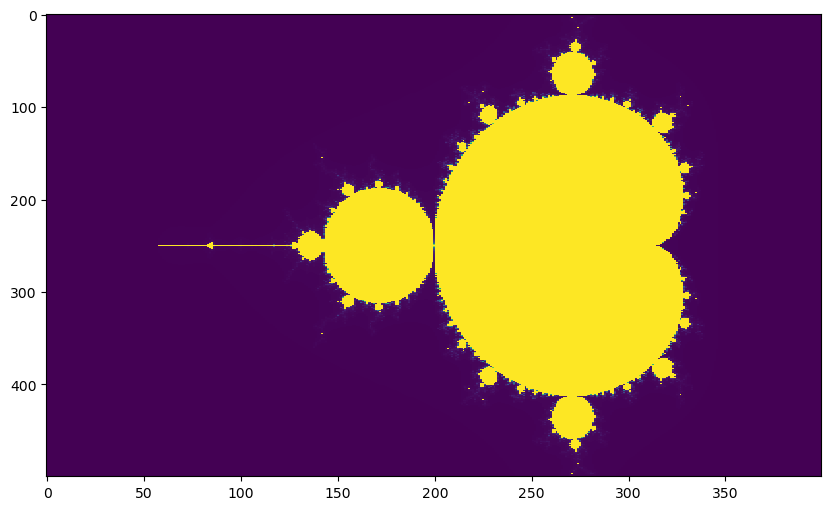

In [11]:
#Nombre: generadorGraficaSecuencial
#Autor: Ejemplo de internet
#Fecha de Creación: 2025-02-13
#Descripción: Ejemplo básico de procesos paralelos.
#Curso: Infraestructuras Paralelas y Distribuidas
#Código: 750023C
import matplotlib.pyplot as plt
from functools import partial
import time


def mandelbrotCalcRow(yPos, h, w, max_iteration = 1000):
    y0 = yPos * (2/float(h)) - 1 #rescale to -1 to 1
    row = []
    for xPos in range(w):
        x0 = xPos * (3.5/float(w)) - 2.5 #rescale to -2.5 to 1
        iteration, z = 0, 0 + 0j
        c = complex(x0, y0)
        while abs(z) < 2 and iteration < max_iteration:
            z = z**2 + c
            iteration += 1
        row.append(iteration)

    return row


def mandelbrotCalcSet(h, w, max_iteration = 1000):
    partialCalcRow = partial(mandelbrotCalcRow, h=h, w=w, max_iteration = max_iteration)
    mandelImg = list(map(partialCalcRow, range(h)))
    return mandelImg


if __name__ == '__main__':
    start_time = time.time()
    mandelImg = mandelbrotCalcSet(500, 400, 1000)
    print("Completed in: %s seconds" % (time.time() - start_time))
    
    plt.figure(figsize=(10, 6), facecolor='w', edgecolor='k')
plt.imshow(mandelImg,  interpolation='nearest', aspect='auto')

Completed in: 6.887767791748047 seconds


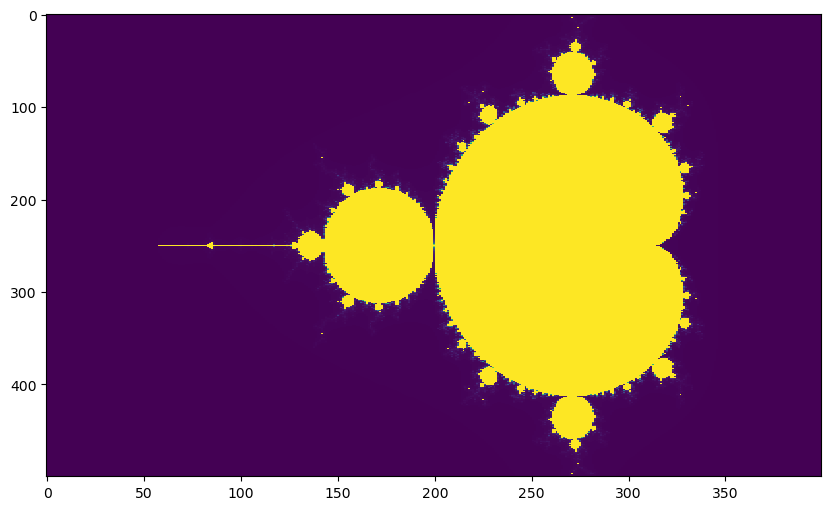

In [13]:
#Nombre: generadorGraficaParalelo
#Autor: Ejemplo de internet
#Fecha de Creación: 2025-02-13
#Descripción: Ejemplo básico de procesos paralelos.
#Curso: Infraestructuras Paralelas y Distribuidas
#Código: 750023C
import multiprocessing as mp


def mandelbrotCalcSet(h, w, max_iteration = 1000):

    partialCalcRow = partial(mandelbrotCalcRow, h=h, w=w, max_iteration = max_iteration)
 
    pool = mp.Pool(processes=4)
    mandelImg = pool.map(partialCalcRow, range(h)) 
    pool.close()
    pool.join()
 
    return mandelImg


if __name__ == '__main__':
    start_time = time.time()
    mandelImg = mandelbrotCalcSet(500, 400, 1000)
    print("Completed in: %s seconds" % (time.time() - start_time))
    
    plt.figure(figsize=(10, 6), facecolor='w', edgecolor='k')
    plt.imshow(mandelImg,  interpolation='nearest', aspect='auto')

In [3]:
#Nombre: generadorGraficaParalelo
#Autor: Ejemplo de internet
#Fecha de Creación: 2025-02-13
#Descripción: Ejemplo básico de procesos paralelos. Función que devuelve el número recibido a través de una cola.
#Curso: Infraestructuras Paralelas y Distribuidas
#Código: 750023C
import multiprocessing as mp
def same_thing(num, queue):
    
    queue.put(num)

if __name__ == '__main__':
    items = [1, 2, 3, 4, 5]
    queue = mp.Queue()
    processes = []
    
    for item in items:
        proc = mp.Process(target=same_thing, args=(item, queue))
        proc.start()
        processes.append(proc)
        
    for proc in processes:
        proc.join()
        
    # Obtener resultados de la cola
    results = []
    for _ in range(len(items)):
        results.append(queue.get())
        
    print(results)

[1, 2, 3, 4, 5]


In [22]:
#Nombre: generadorGraficaParalelo
#Autor: Ejemplo de internet
#Fecha de Creación: 2025-02-13
#Descripción: Ejemplo Vector fibonacci secuencial
#Curso: Infraestructuras Paralelas y Distribuidas
#Código: 750023C
import numpy as np

def fibonacci(n):
    if n <= 1:
        return n
    else:
        return fibonacci(n-1) + fibonacci(n-2)

MAX_VECTOR = 10

# Inicialización del vector
vector = np.arange(MAX_VECTOR)

# Operación: calcular Fibonacci para cada elemento
for i in range(MAX_VECTOR):
    vector[i] = fibonacci(i)

# Impresión ordenada del vector
print("[", end=' ')
for i in range(MAX_VECTOR):
    print(f"{vector[i]} ", end='')
print("]")

[ 0 1 1 2 3 5 8 13 21 34 ]


In [28]:
#Nombre: VectorParaleloEficiente
#Autor: Ejemplo de internet
#Fecha de Creación: 2025-02-13
#Descripción: Ejemplo Vector fibonacci paralelo de forma eficiente.
#Curso: Infraestructuras Paralelas y Distribuidas
#Código: 750023C
import numpy as np
import time
from multiprocessing import Pool

#Función para calcular el número de Fibonacci.
def fibonacci(n):
    if n <= 1:
        return n
    else:
        return fibonacci(n-1) + fibonacci(n-2)

#Función que calcula Fibonacci para un índice específico.
def calcular_fibonacci(i):
    return fibonacci(i)

MAX_VECTOR = 10

# Iniciar temporizador
inicio = time.time()

# Crear un pool de procesos Este método es parte de la clase Pool del módulo multiprocessing. 
# Permite aplicar una función a cada elemento de un iterable (como una lista o un rango de números) en paralelo, 
# en este caso se calcula directamente el fibonacci de cada posición al tiempo
with Pool() as pool:
    # Calcular Fibonacci para cada elemento en paralelo
    vector = pool.map(calcular_fibonacci, range(MAX_VECTOR))

# Impresión ordenada del vector
print("[", end=' ')
for i in range(MAX_VECTOR):
    print(f"{vector[i]} ", end='')
print("]")
# Detener temporizador
fin = time.time()
    
# Calcular tiempo de ejecución
tiempo_ejecucion = fin - inicio
    
#  el tiempo de ejecución
print(f"Tiempo de ejecución: {tiempo_ejecucion:.4f} segundos")

[ 0 1 1 2 3 5 8 13 21 34 ]
Tiempo de ejecución: 0.0358 segundos


In [40]:
#Nombre: VectorParalelo
#Autor: Ejemplo de internet
#Fecha de Creación: 2025-02-13
#Descripción: Ejemplo Vector fibonacci paralelo de forma menos eficiente pero valida.
#Curso: Infraestructuras Paralelas y Distribuidas
#Código: 750023C
import numpy as np
import time
from multiprocessing import Process, Queue

"""Función para calcular el número de Fibonacci."""
def fibonacci(n):    
    if n <= 1:
        return n
    else:
        return fibonacci(n-1) + fibonacci(n-2)
        
"""Envía el resultado junto con el índice i a la cola queue. 
   Esto permite que el proceso principal recupere los resultados de cada proceso hijo."""
def calcular_fibonacci(i, queue):
    result = fibonacci(i)
    queue.put((i, result))

MAX_VECTOR = 10
# Iniciar temporizador
inicio = time.time()

# Crear una cola para recopilar resultados
queue = Queue()

# Crear y iniciar procesos
processes = []
for i in range(MAX_VECTOR):
    """Crea un nuevo proceso que ejecuta la función calcular_fibonacci con el índice actual i y 
    la cola queue como argumentos."""
    proc = Process(target=calcular_fibonacci, args=(i, queue))
    proc.start()
    processes.append(proc)

# Esperar a que todos los procesos terminen
for proc in processes:
    proc.join()

# Recopilar resultados de la cola
vector = [None] * MAX_VECTOR
while not queue.empty():
    i, result = queue.get()
    vector[i] = result

# Impresión ordenada del vector
# end = '' Evita que se agregue un salto de línea después de cada número
print("[", end=' ')
for i in range(MAX_VECTOR):
    print(f"{vector[i]} ", end='')
print("]")

# Detener temporizador
fin = time.time()
    
# Calcular tiempo de ejecución
tiempo_ejecucion = fin - inicio
    
#  el tiempo de ejecución
print(f"Tiempo de ejecución: {tiempo_ejecucion:.4f} segundos")

[ 0 1 1 2 3 5 8 13 21 34 ]
Tiempo de ejecución: 0.0703 segundos
